# **Final Project - Visual Analytics**

## A visual music recommender system powere by Spotify data

### Members: 
- Marina Castellano Blanco NIA 242409
- Júlia Othats-Dalès Gibert NIA 254435

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

### Data Loading 

In [7]:
data = pd.read_csv("data/top10s.csv", encoding='latin1')
data = data.drop(data.columns[0], axis=1)
data.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


### Basic Statistics

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      603 non-null    object
 1   artist     603 non-null    object
 2   top genre  603 non-null    object
 3   year       603 non-null    int64 
 4   bpm        603 non-null    int64 
 5   nrgy       603 non-null    int64 
 6   dnce       603 non-null    int64 
 7   dB         603 non-null    int64 
 8   live       603 non-null    int64 
 9   val        603 non-null    int64 
 10  dur        603 non-null    int64 
 11  acous      603 non-null    int64 
 12  spch       603 non-null    int64 
 13  pop        603 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 66.1+ KB


In [9]:
data.describe()


,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


In [10]:
# To get descriptive statistics for categorical columns
data.describe(include="O")

,title,artist,top genre
count,603,603,603
unique,584,184,50
top,Just the Way You Are,Katy Perry,dance pop
freq,2,17,327


In [11]:
data.isna().sum()

title        0
artist       0
top genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
dtype: int64

### Preprocessing

In [14]:
# Count duplicate songs
print(f"There are {data.duplicated().sum()} duplicate songs.")

There are 0 duplicate songs.


### EDA

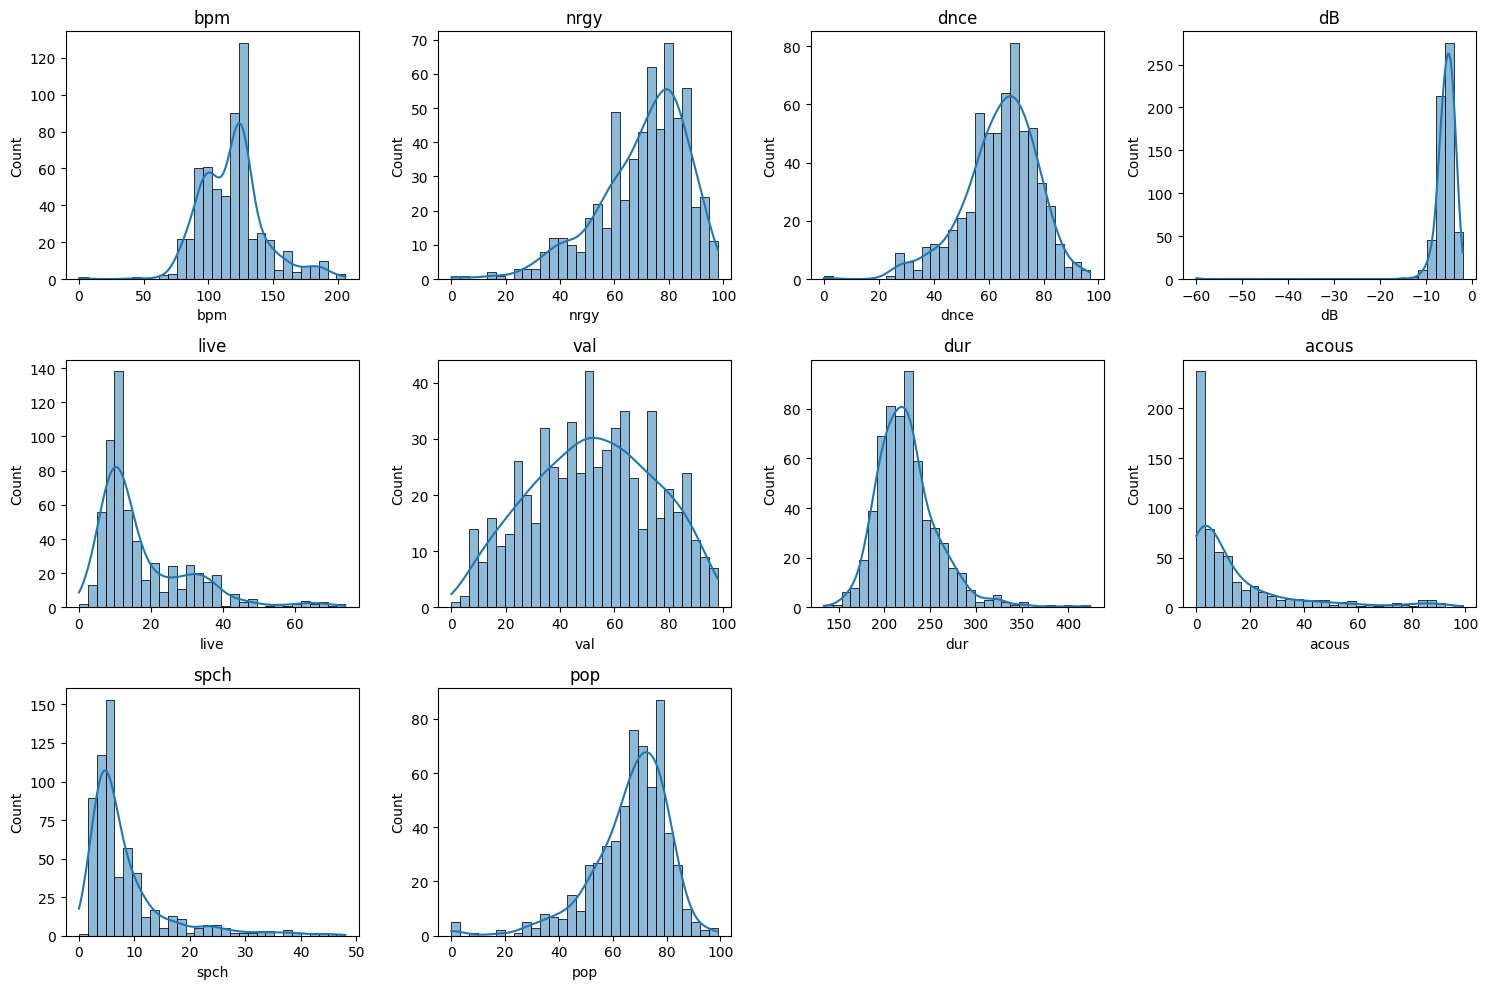

In [ ]:
# Visualize distributions of numeric features

numeric_cols = ['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3,4,i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

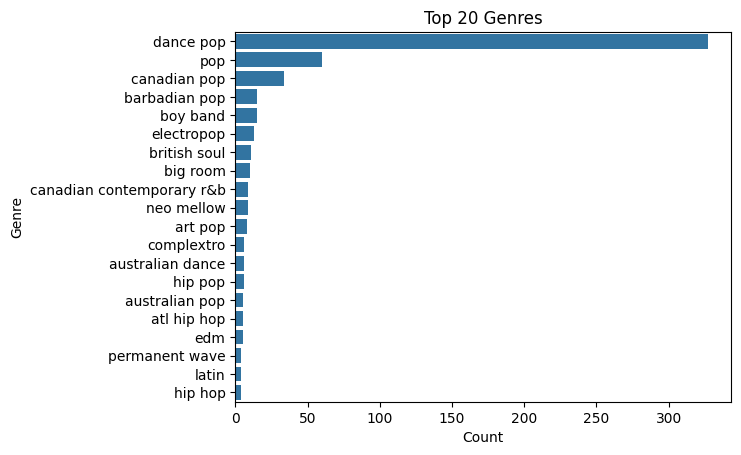

In [17]:
# Visualize top 20 genres

top_genres = data['top genre'].value_counts().head(20)
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 20 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

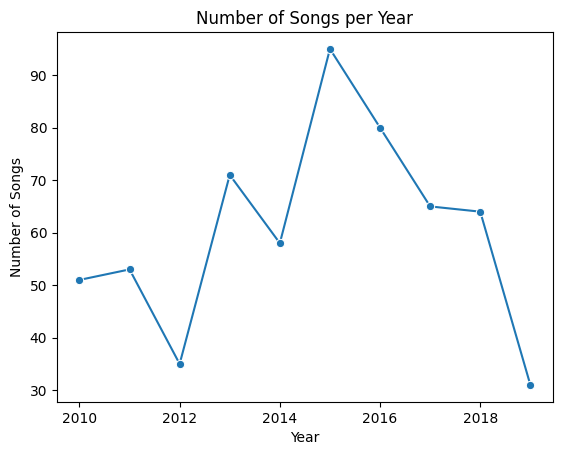

In [18]:
# Number of songs released per year

songs_per_year = data['year'].value_counts().sort_index()
sns.lineplot(x=songs_per_year.index, y=songs_per_year.values, marker='o')
plt.title('Number of Songs per Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.show()


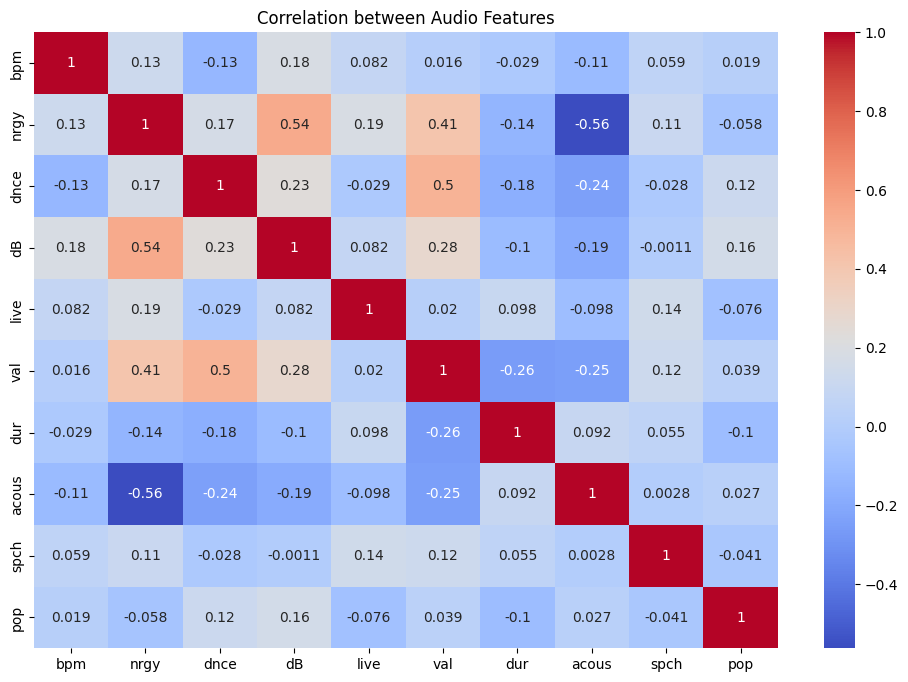

In [19]:
# Relationship between audio features

plt.figure(figsize=(12,8))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Audio Features')
plt.show()


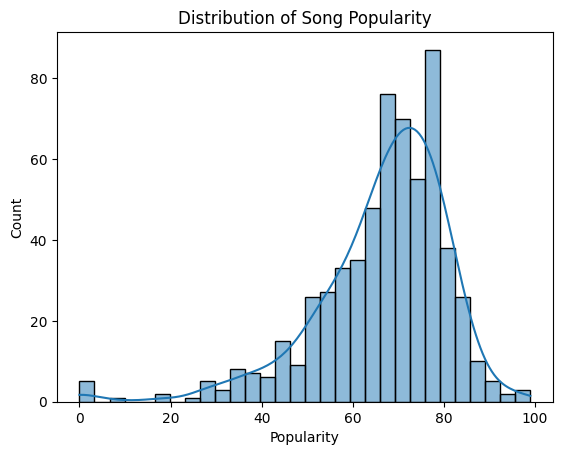

In [20]:
sns.histplot(data['pop'], bins=30, kde=True)
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.show()


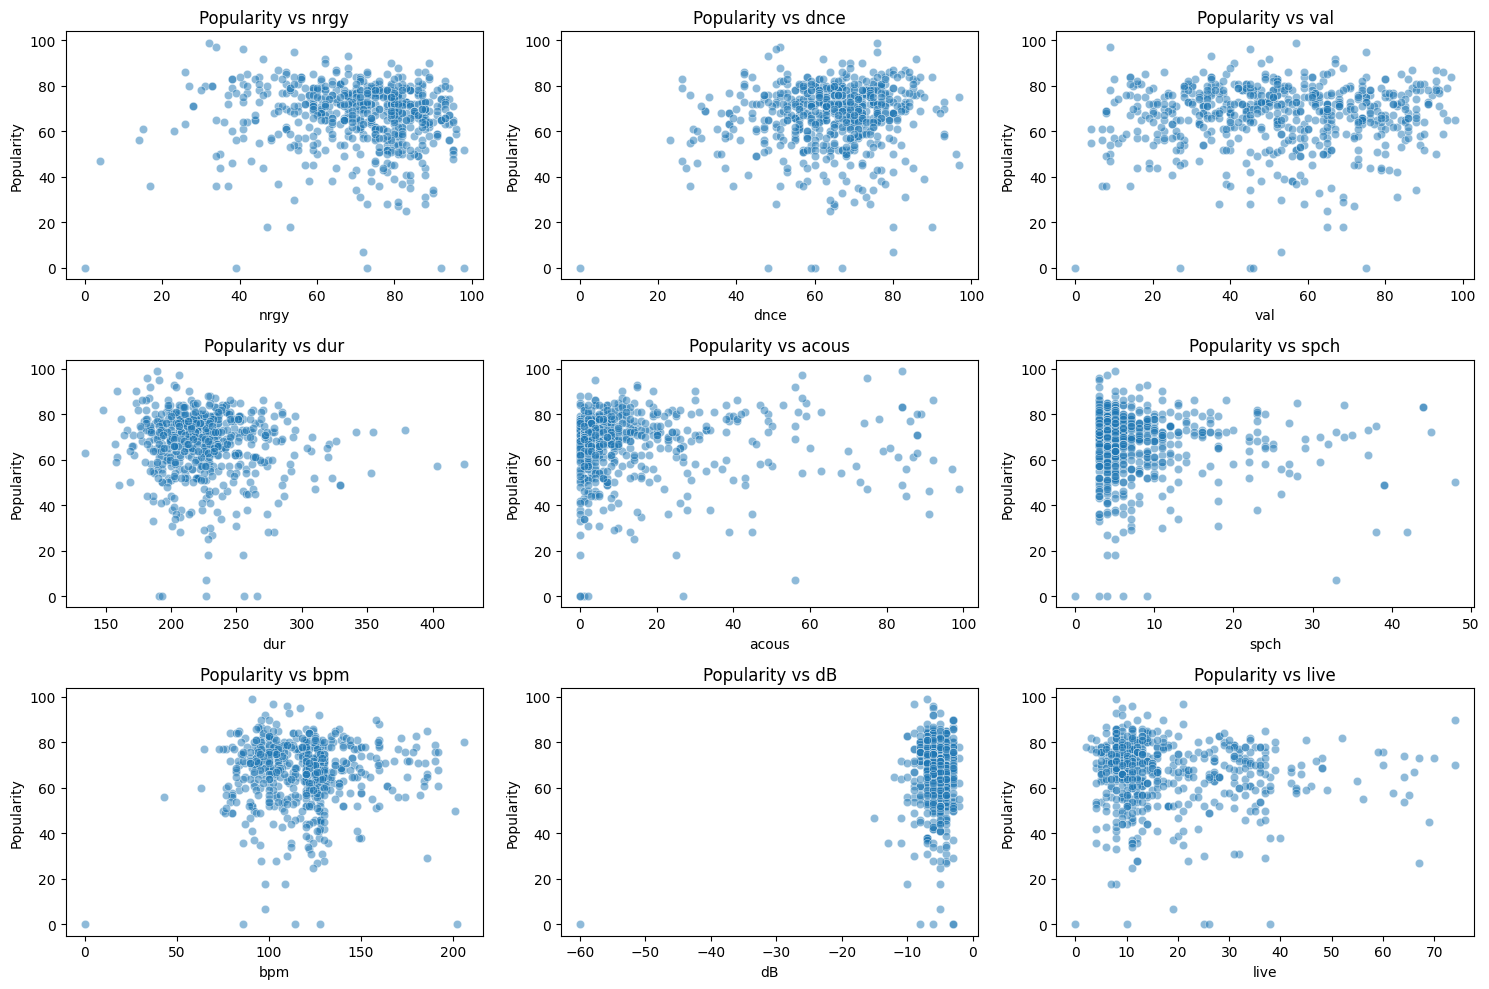

In [22]:
features = ['nrgy', 'dnce', 'val', 'dur', 'acous', 'spch', 'bpm', 'dB', 'live']

plt.figure(figsize=(15,10))

for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)  # adjust rows/cols for number of features
    sns.scatterplot(data=data, x=col, y='pop', alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('Popularity')
    plt.title(f'Popularity vs {col}')

plt.tight_layout()
plt.show()

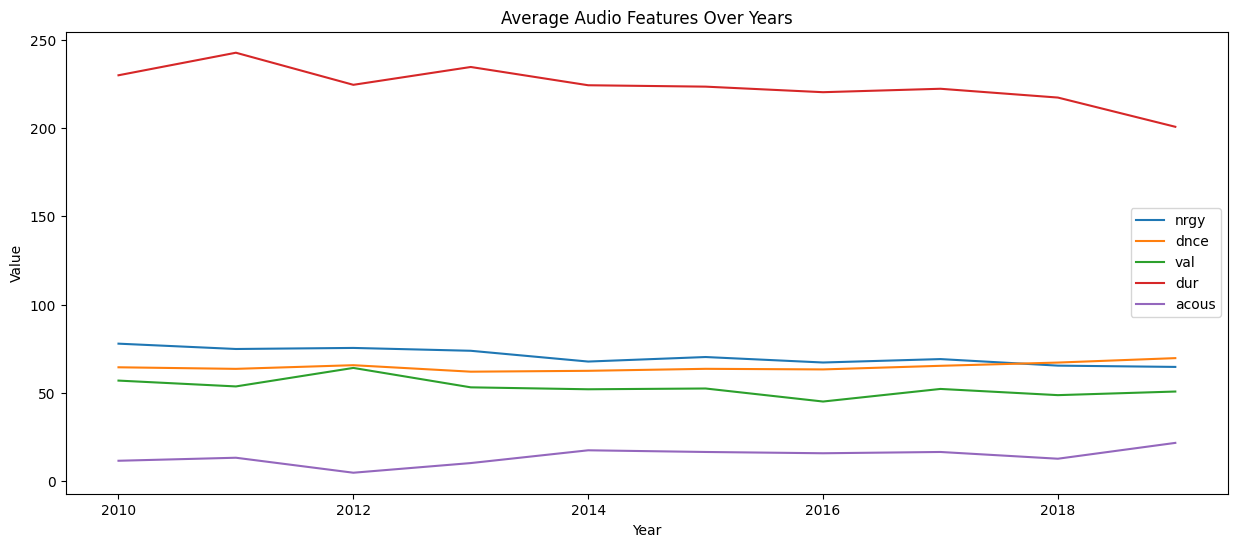

In [23]:
avg_features_year = data.groupby('year')[numeric_cols].mean().reset_index()
plt.figure(figsize=(15,6))
for col in ['nrgy','dnce','val','dur','acous']:
    sns.lineplot(data=avg_features_year, x='year', y=col, label=col)
plt.title('Average Audio Features Over Years')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()


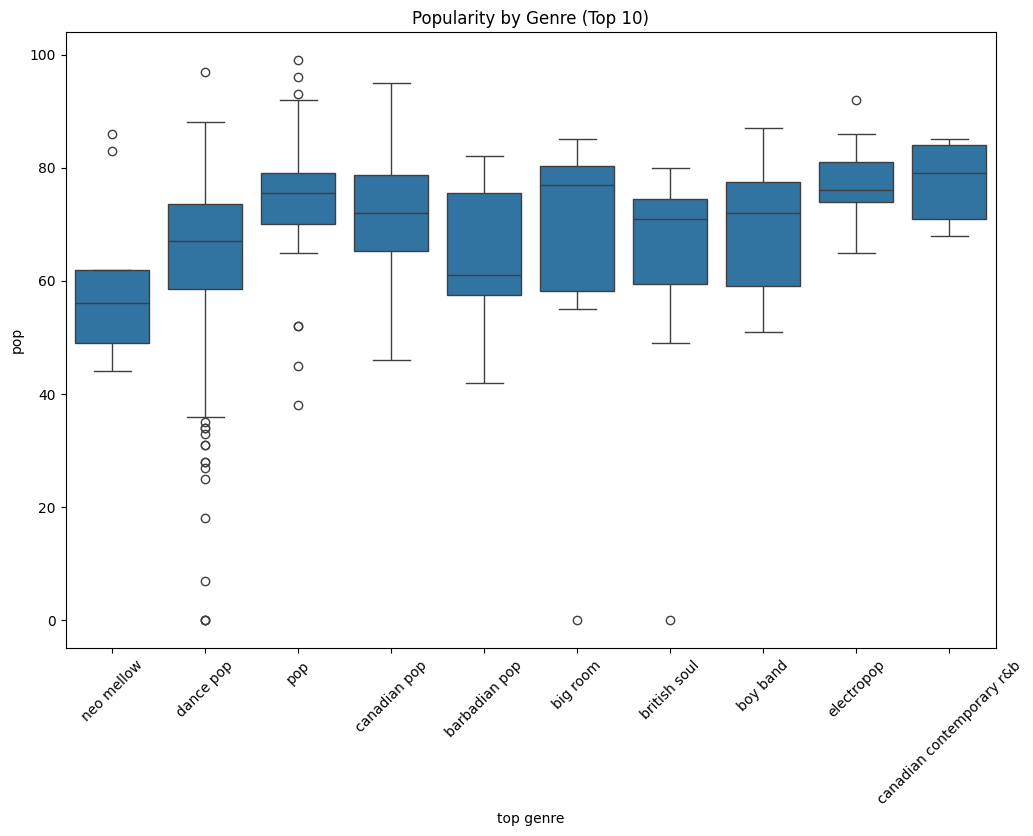

In [24]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data[data['top genre'].isin(top_genres.index[:10])], x='top genre', y='pop')
plt.title('Popularity by Genre (Top 10)')
plt.xticks(rotation=45)
plt.show()


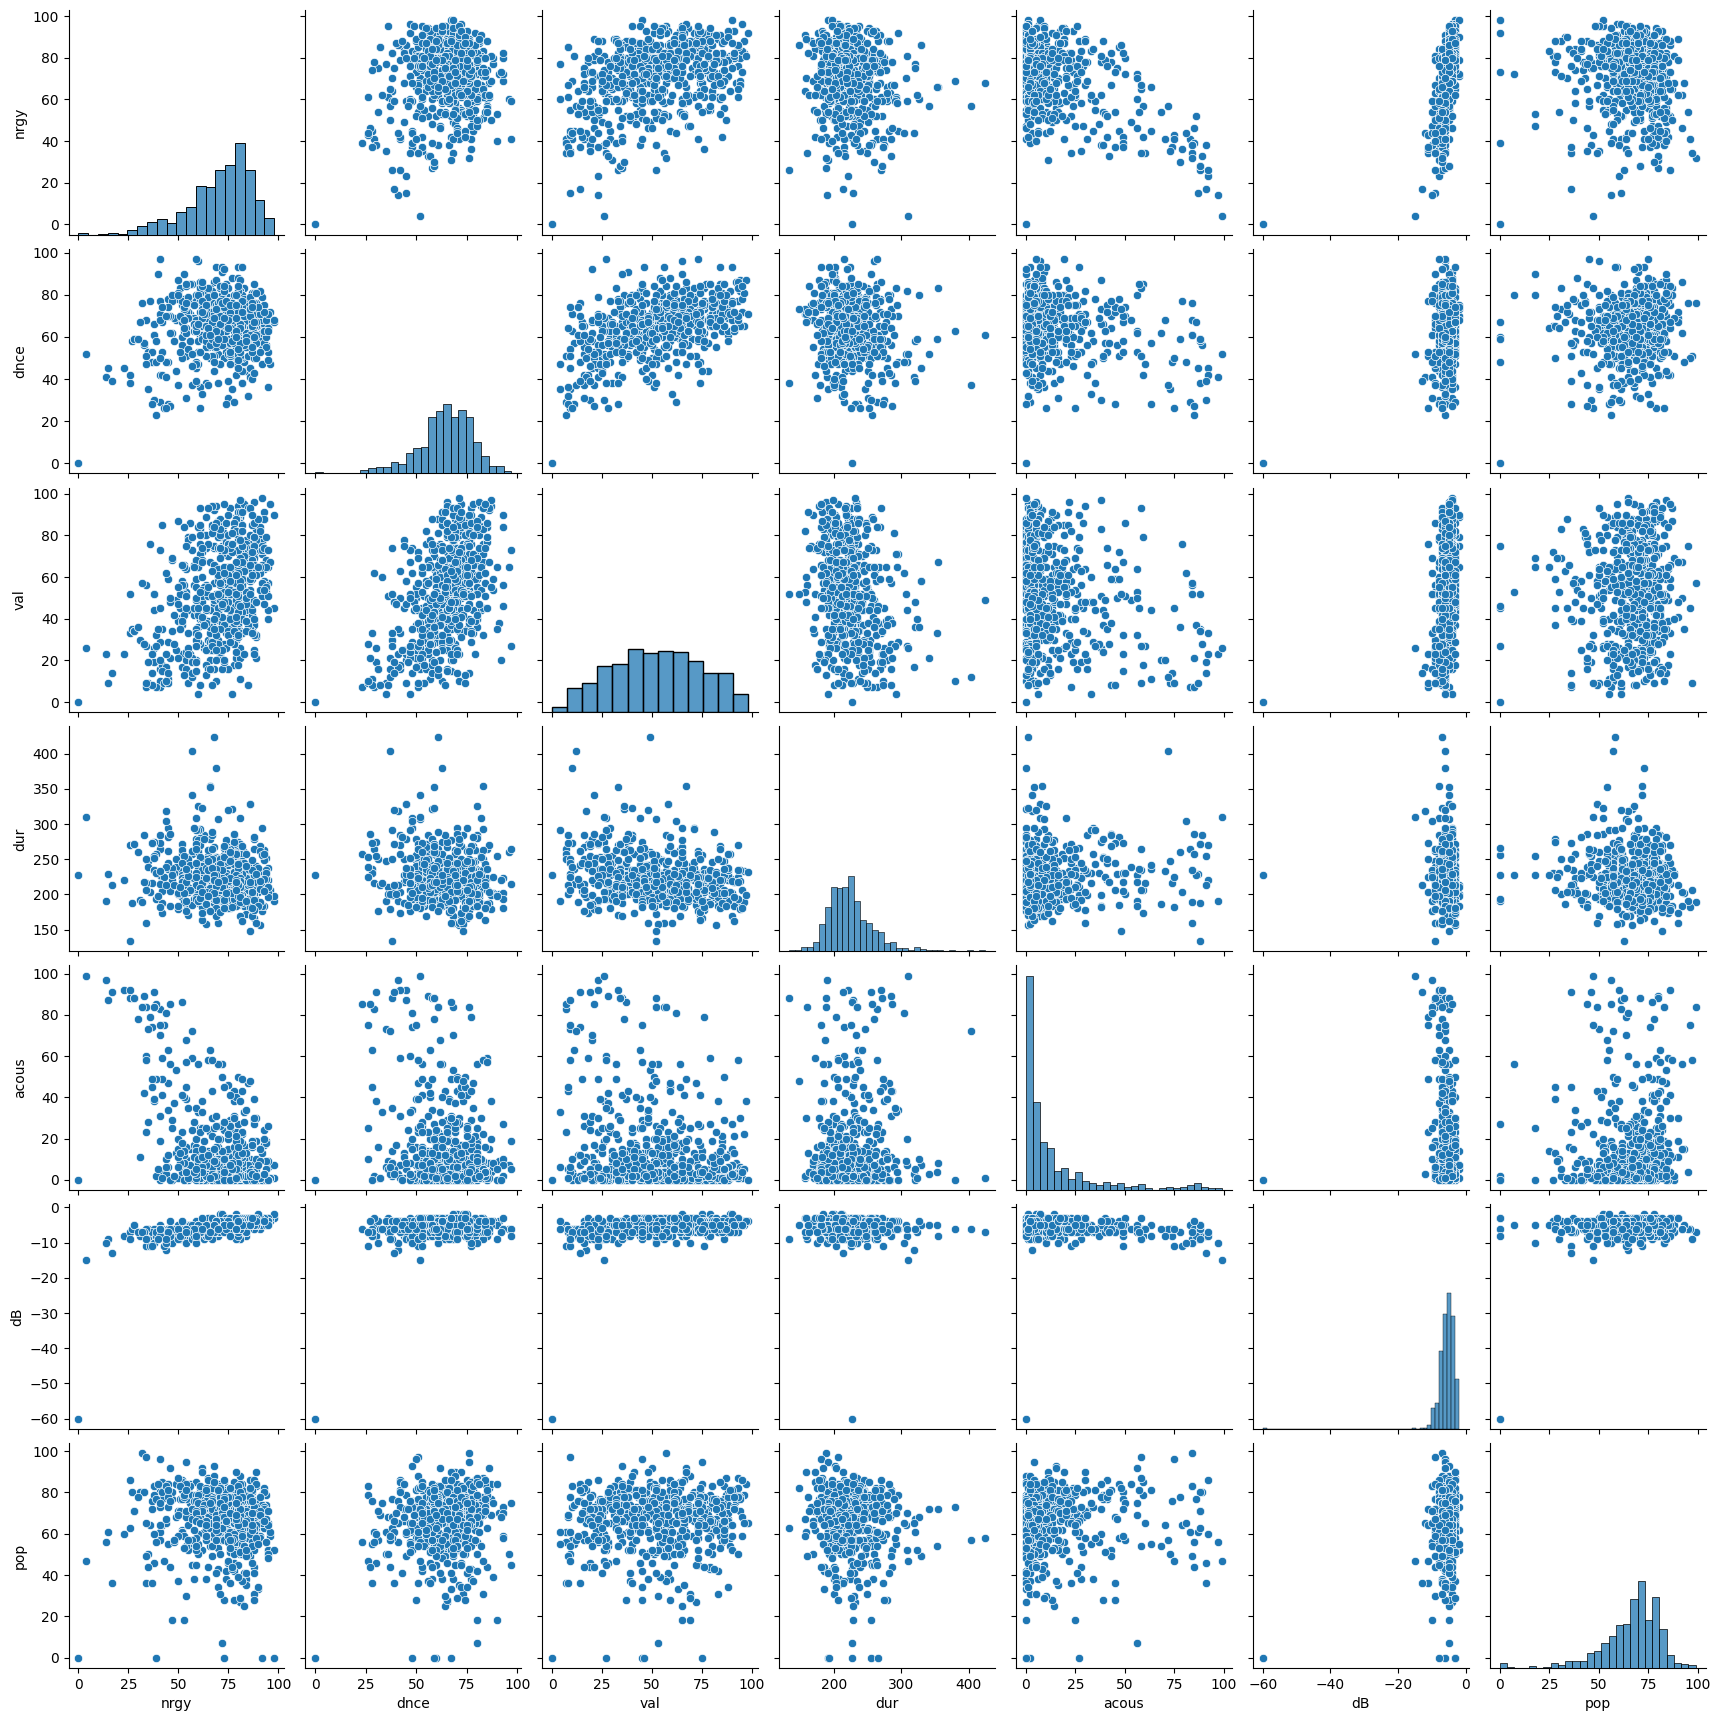

In [26]:
sns.pairplot(data[['nrgy','dnce','val','dur','acous','dB','pop']])
plt.show()
